# <center>`Hotel booking demand`</center>


### That we will make predictive model to predict whether the booking will be cancelled or not cancelled

**We will:**<br>

    - Perform the Feature Engineering to make new featuers
    - Perform the Data Selection to select only relevant features 
    - Tranform the Data (Categorial to Numerical)
    - Split the data (Train Test Split)
    - Model the data (Fit the Data)
    - And finally Evaluate our model

#  Explore The Data: What Data Are We Using?
              This data set contains booking information for a city hotel and a resort hotel, and includes information such as when  the booking was made, length of stay, the number of adults, children, and/or babies,and the number of available parking spaces, among other things. Using the booking information about these hotels, the challenge is to build a model to predict booking cancellation based on the following fields:

## Data Description   :
  - <b>hotel</b> (str) - Hotel (H1 = Resort Hotel or H2 = City Hotel)<br>
  - <b>lead_time</b> (int) - Number of days that elapsed between the entering date of the booking into the PMS and the arrival date<br>
  - <b>arrival_date_year</b> (int) - Year of arrival date<br>
  - <b>arrival_date_month</b> (str) - Month of arrival date<br>
  - <b>arrival_date_week_number</b> (int) - Week number of year for arrival date<br>
  - <b>arrival_date_day_of_month</b> (int) - Day of arrival date<br>
  - <b>stays_in_weekend_nights</b> (int) - Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel<br>
  - <b>stays_in_week_nights</b> (int) - Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel<br>
  - <b>adults</b> (int) - Number of adults<br>
  - <b>children</b> (float) - Number of children<br>
  - <b>babies</b> (int) - Number of babies<br>
  - <b>meal</b> (str) - Type of meal booked. Categories are presented in standard hospitality meal packages: (Undefined/SC = no meal package, BB = Bed & Breakfast, HB = Half board – breakfast and one other meal - usually dinner, FB = Full board – breakfast, lunch and dinner)<br>
  - <b>country</b> (str) - Country of origin. Categories are represented in the ISO 3155–3:2013 format<br>
  - <b>market_segment</b> (str) - Market segment designation (TA = Travel Agents, TO = Tour Operators)<br>
  - <b>distribution_channel</b> (str) - Booking distribution channel (TA = Travel Agents, TO = Tour Operators)<br>
  - <b>is_repeated_guest</b> (int) - Value indicating if the booking name was from a repeated guest (1) or not (0)<br>
  - <b>previous_cancellations</b> (int) - Number of previous bookings that were cancelled by the customer prior to the current booking<br>
  - <b>previous_bookings_not_canceled</b> (int) - Number of previous bookings not cancelled by the customer prior to the current booking<br>
  - <b>reserved_room_type</b> (str) - Code of room type reserved. Code is presented instead of designation for anonymity reasons<br>
  - <b>assigned_room_type</b> (str) - Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons<br>
  - <b>booking_changes</b> (int) - Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation<br>
  - <b>deposit_type</b> (str) - Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: (No Deposit = no deposit was made, Non Refund = a deposit was made in the value of the total stay cost, Refundable = a deposit was made with a value under the total cost of stay)<br>
  - <b>agent</b> (float) - ID of the travel agency that made the booking<br>
  - <b>company</b> (float) - ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons<br>
  - <b>days_in_waiting_list</b> (int) - Number of days the booking was in the waiting list before it was confirmed to the customer<br>
  - <b>customer_type</b> (str) - Type of booking, assuming one of four categories: (Contract = when the booking has an allotment or other type of contract associated to it, Group = when the booking is associated to a group, Transient = when the booking is not part of a group or contract, and is not associated to other transient booking, Transient-party = when the booking is transient, but is associated to at least other transient booking<br>
  - <b>adr</b> (float) - Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights<br>
  - <b>required_car_parking_spaces</b> (int) - Number of car parking spaces required by the customer<br>
  - <b>total_of_special_requests</b> (int) - Number of special requests made by the customer (e.g. twin bed or high floor)<br>
  - <b>reservation_status</b> (str) - Reservation last status, assuming one of three categories: (Canceled = booking was canceled by the customer, Check-Out = customer has checked in but already departed, No-Show = customer did not check-in and did inform the hotel of the reason why)<br>
  - <b>reservation_status_date</b> (str) - Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel<br>
   

# Packages Import

In [1]:
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder

import joblib as jb
from time import time

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

# Read the train data

`Loading the data into the pandas data frame is certainly one of the most important steps in EDA, as we can see that the value from the data set is comma-separated. So all we have to do is to just read the CSV into a data frame and pandas data frame does the job for us.`

In [2]:
hotel_raw_data=pd.read_csv("hotel_data/client_train.csv")

In [3]:
# To display the top 5 rows
hotel_raw_data.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,City Hotel,1,365,2015,October,42,17,1,1,2,...,Non Refund,1.0,NaN,0,Transient,62.8,0,0,Canceled,2015-01-30
1,Resort Hotel,1,94,2017,January,4,28,0,1,2,...,No Deposit,240.0,NaN,0,Transient,42.0,0,1,Canceled,2016-10-27
2,City Hotel,1,405,2016,August,34,18,0,2,2,...,Non Refund,1.0,NaN,0,Transient,62.0,0,0,Canceled,2015-10-21
3,City Hotel,0,5,2016,February,6,2,0,1,1,...,No Deposit,9.0,NaN,0,Transient,79.0,0,1,Check-Out,2016-02-03
4,City Hotel,1,46,2016,December,50,8,0,3,2,...,No Deposit,9.0,NaN,0,Transient,111.6,0,1,Canceled,2016-11-04


# Data Pre-Processing
`Preprocessing in Data Mining: Data preprocessing is a data mining technique which is used to transform the raw data in a useful and efficient format.`

In [4]:
## Copy the dataset
h_data= hotel_raw_data.copy()

## In this step come to know shape of the data

In [5]:
h_data.shape

(83573, 32)

## Identifying unique values in data

In [6]:
h_data.nunique()

hotel                                2
is_canceled                          2
lead_time                          477
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             16
stays_in_week_nights                31
adults                              12
children                             5
babies                               5
meal                                 5
country                            168
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      57
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     19
deposit_type                         3
agent                              321
company                            321
days_in_waiting_list     

## To get all columns name 

In [7]:
h_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

##  Information about the dataset

In [8]:
h_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           83573 non-null  object 
 1   is_canceled                     83573 non-null  int64  
 2   lead_time                       83573 non-null  int64  
 3   arrival_date_year               83573 non-null  int64  
 4   arrival_date_month              83573 non-null  object 
 5   arrival_date_week_number        83573 non-null  int64  
 6   arrival_date_day_of_month       83573 non-null  int64  
 7   stays_in_weekend_nights         83573 non-null  int64  
 8   stays_in_week_nights            83573 non-null  int64  
 9   adults                          83573 non-null  int64  
 10  children                        83571 non-null  float64
 11  babies                          83573 non-null  int64  
 12  meal                            

## Checking for null values

In [9]:
h_data.isnull().sum().sort_values(ascending=False)[:10]

company                   78870
agent                     11360
country                     329
children                      2
reserved_room_type            0
assigned_room_type            0
booking_changes               0
deposit_type                  0
hotel                         0
previous_cancellations        0
dtype: int64

## Fill in missing/null values

In [10]:
## Drop Rows where there is no adult, baby and child

h_data = h_data.drop(h_data[(h_data.adults+h_data.babies+h_data.children)==0].index)

`missing values in the 'agent' and 'company' columns of the 'h_data' dataframe. The code uses the fillna() method from pandas to replace any null values in these columns with the value 0.0.`

In [11]:
## If no id of agent or company is null, just replace it with 0

h_data[['agent','company']] = h_data[['agent','company']].fillna(0.0)

In [12]:
## For the missing values in the country column, replace it with mode (value that appears most often)

h_data['country'].fillna(h_data.country.mode().to_string(), inplace=True)

In [13]:
## for missing children value, replace it with rounded mean value

h_data['children'].fillna(round(h_data.children.mean()), inplace=True)

In [14]:
h_data.isnull().sum().sort_values(ascending=False)[:10]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
adr                            0
customer_type                  0
days_in_waiting_list           0
company                        0
agent                          0
dtype: int64

<div class="alert alert-info"> 
    hence the null and missing values are rectified
    </div>

## Checking for duplicate rows

In [15]:
## we got total number of rows,columns
h_data.shape

(83443, 32)

` The duplicated() function is applied to the h_data DataFrame, which checks each row and returns a boolean Series indicating whether each row is a duplicate or not. Only the duplicate rows are selected and stored in the duplicate_rows_df variable.`

In [16]:
## that we have more duplicates we have no option so we drop the datas
duplicate_rows_df = h_data[h_data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (20362, 32)


In [17]:
## drop the duplicated values
h_data = h_data.drop_duplicates()
h_data.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,City Hotel,1,365,2015,October,42,17,1,1,2,...,Non Refund,1.0,0.0,0,Transient,62.8,0,0,Canceled,2015-01-30
1,Resort Hotel,1,94,2017,January,4,28,0,1,2,...,No Deposit,240.0,0.0,0,Transient,42.0,0,1,Canceled,2016-10-27
2,City Hotel,1,405,2016,August,34,18,0,2,2,...,Non Refund,1.0,0.0,0,Transient,62.0,0,0,Canceled,2015-10-21
3,City Hotel,0,5,2016,February,6,2,0,1,1,...,No Deposit,9.0,0.0,0,Transient,79.0,0,1,Check-Out,2016-02-03
4,City Hotel,1,46,2016,December,50,8,0,3,2,...,No Deposit,9.0,0.0,0,Transient,111.6,0,1,Canceled,2016-11-04


## convert datatype of these columns from float to integer

In [18]:
h_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63081 entries, 0 to 83572
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           63081 non-null  object 
 1   is_canceled                     63081 non-null  int64  
 2   lead_time                       63081 non-null  int64  
 3   arrival_date_year               63081 non-null  int64  
 4   arrival_date_month              63081 non-null  object 
 5   arrival_date_week_number        63081 non-null  int64  
 6   arrival_date_day_of_month       63081 non-null  int64  
 7   stays_in_weekend_nights         63081 non-null  int64  
 8   stays_in_week_nights            63081 non-null  int64  
 9   adults                          63081 non-null  int64  
 10  children                        63081 non-null  float64
 11  babies                          63081 non-null  int64  
 12  meal                            

` converting the data types of three columns ('children', 'company', and 'agent') in the 'h_data' dataframe to 'int64'.`

In [19]:
h_data [['children', 'company', 'agent']] = h_data [['children', 'company', 'agent']].astype('int64')

# split the data train, test

In [20]:
## take a copy of data(for good practice)
hotel_data_copy=h_data.copy()

In [21]:
# Target and labels
y =hotel_data_copy['is_canceled'].copy()
X =hotel_data_copy.drop('is_canceled',axis=1).copy()

X_train,X_test,y_train,y_test= train_test_split(X,y, train_size=0.7, shuffle=True , random_state=123)

` It separates the target variable and the labels from the data. The target variable is copied into the variable y, and the remaining features are copied into the variable X. The target variable is the column named 'is_canceled', and it represents whether a hotel booking was canceled or not.`

`It splits the data into training and testing sets using the train_test_split function from the scikit-learn library. The X and y variables are split into X_train, X_test, y_train, and y_test with a train size of 0.7 (70% of the data) and a random state of 123 for reproducibility. The shuffle parameter is set to True to shuffle the data before splitting.`

In [22]:
##  storeing data in csv(comma seperated values) file.
X_train.to_csv('hotel_data/train/train_splited_X,y/x_train.csv',index=False)
y_train.to_csv('hotel_data/train/train_splited_X,y/y_train.csv',index=False)

X_test.to_csv('hotel_data/evaluate/x_test.csv',index=False)
y_test.to_csv('hotel_data/evaluate/y_test.csv',index=False)

 `It saves the training data (X_train and y_train) into separate CSV files named 'train_splited_X,y/x_train.csv' and 'train_splited_X,y/y_train.csv' respectively, under the 'hotel_data/train' directory. The testing data (X_test and y_test) is saved into CSV files named 'x_test.csv' and 'y_test.csv' respectively, under the 'hotel_data/evaluate' directory.`

# Feature Encoding

 `As we all know that better encoding leads to a better model and most algorithms cannot handle the categorical variables unless they are converted into a numerical value`

In [23]:
## load ordinalencoder as encoder
encoder =OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
## The code initializes an OrdinalEncoder object named encoder. 
## This encoder will be used to convert categorical variables into numerical values. 
## The handle_unknown parameter is set to 'use_encoded_value',
## which means that if unknown categories are encountered during encoding,
## they will be assigned a value based on the unknown_value parameter, which is set to -1 in this case.

In [24]:
## fit and transform x train to encoder to perform the encoding process
## The code initializes an OrdinalEncoder object named encoder.
## This encoder is used to convert categorical variables into numerical values.
X_encode=encoder.fit(X_train)

## dump the encode model using joblimb as pkl file
jb.dump(X_encode,'hotel_data/train/model/train_encode_model.pkl')

X_encode=encoder.transform(X_train)

## After saving the encoded model, 
## the code transforms the X_train data using the encoder again, 
## storing the transformed data in the variable X_train_encoded. 
## This step ensures that you have the encoded data in a DataFrame format.

X_train_encoded=pd.DataFrame(X_encode, columns=X_train.columns)

In [25]:
X_train_encoded.head(5)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0.0,79.0,2.0,0.0,14.0,10.0,0.0,3.0,1.0,0.0,...,0.0,7.0,0.0,0.0,2.0,1988.0,0.0,1.0,1.0,750.0
1,0.0,7.0,1.0,10.0,41.0,12.0,0.0,2.0,2.0,2.0,...,0.0,7.0,0.0,0.0,2.0,5748.0,0.0,1.0,1.0,569.0
2,1.0,3.0,1.0,8.0,18.0,3.0,0.0,3.0,2.0,0.0,...,0.0,163.0,0.0,0.0,2.0,1877.0,1.0,1.0,1.0,408.0
3,0.0,0.0,2.0,3.0,7.0,18.0,1.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,2.0,2538.0,0.0,0.0,1.0,697.0
4,1.0,212.0,1.0,0.0,15.0,10.0,2.0,5.0,2.0,0.0,...,1.0,183.0,0.0,0.0,2.0,1553.0,0.0,0.0,0.0,204.0


In [26]:
y_train.head(5)

68452    0
10899    0
52694    0
45892    0
7185     1
Name: is_canceled, dtype: int64

# feature_selection
 -`performing feature selection using the SelectKBest algorithm from the scikit-learn library. Feature selection helps to identify the most important features or variables that are relevant for the prediction task.`<br>
 -`These lines import the necessary modules for feature selection. SelectKBest is the class used for feature selection, and chi2 is the scoring function that will be used to evaluate the features.`

In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train_encoded,y_train)

# This step responsible for displaying the top 10 features with their corresponding scores`

In [28]:
data_scores   = pd.DataFrame(fit.scores_)
data_columns  = pd.DataFrame(X.columns)
featureScores = pd.concat([data_columns,data_scores],axis=1)
featureScores.columns = ['good_features','Score']  
print(featureScores.nlargest(10,'Score'))  


                     good_features          Score
26                             adr  729118.573823
1                        lead_time  143668.618608
23                         company   32704.574621
12                         country   11054.994805
29              reservation_status    9935.975351
30         reservation_status_date    6170.740256
17  previous_bookings_not_canceled    1721.585976
27     required_car_parking_spaces    1423.765161
21                    deposit_type    1312.471634
20                 booking_changes     728.110177


## `now we got the good feature and score.`
  next step we load the 10 largest score in a veriable

In [29]:
feature=featureScores.nlargest(10,'Score')
feature

,good_features,Score
26,adr,729118.573823
1,lead_time,143668.618608
23,company,32704.574621
12,country,11054.994805
29,reservation_status,9935.975351
30,reservation_status_date,6170.740256
17,previous_bookings_not_canceled,1721.585976
27,required_car_parking_spaces,1423.765161
21,deposit_type,1312.471634
20,booking_changes,728.110177


## next we make concat good feature and the score`

In [30]:
feature_list=feature['good_features'].to_list()

In [31]:
feature_list

['adr',
 'lead_time',
 'company',
 'country',
 'reservation_status',
 'reservation_status_date',
 'previous_bookings_not_canceled',
 'required_car_parking_spaces',
 'deposit_type',
 'booking_changes']

 `The pickled file allows you to store Python objects, such as the feature_list variable, in a serialized format, which can be loaded and used later. This can be helpful when you want to save and load variables or models for future use without having to recompute them.`

In [32]:
import joblib as jb
jb.dump(feature_list,'hotel_data/train/model/featureselected_model.pkl')

['hotel_data/train/model/featureselected_model.pkl']

In [33]:
featuer_selected=X_train_encoded[feature_list]
featuer_selected

,adr,lead_time,company,country,reservation_status,reservation_status_date,previous_bookings_not_canceled,required_car_parking_spaces,deposit_type,booking_changes
0,1988.0,79.0,0.0,49.0,1.0,750.0,0.0,0.0,0.0,0.0
1,5748.0,7.0,0.0,54.0,1.0,569.0,0.0,0.0,0.0,0.0
2,1877.0,3.0,0.0,125.0,1.0,408.0,0.0,1.0,0.0,1.0
3,2538.0,0.0,0.0,125.0,1.0,697.0,0.0,0.0,0.0,0.0
4,1553.0,212.0,0.0,125.0,0.0,204.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
44151,5923.0,110.0,0.0,73.0,0.0,733.0,0.0,0.0,0.0,0.0
44152,47.0,8.0,0.0,125.0,1.0,316.0,0.0,0.0,0.0,0.0
44153,2192.0,301.0,0.0,128.0,1.0,494.0,0.0,0.0,0.0,1.0
44154,877.0,0.0,0.0,74.0,1.0,720.0,0.0,0.0,0.0,0.0


In [34]:
featuer_selected.to_csv('hotel_data/train/processed/featureSelected_X_train.csv',index=False)

#  Model Training

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [36]:
lor=LogisticRegression()
lor.fit(featuer_selected,y_train)
start = time()
end= time()
print('Train score:',lor.score(featuer_selected,y_train)* 100)


Train score: 98.41924087326751


In [37]:
tree_clf = DecisionTreeClassifier(criterion='entropy',max_depth=2)
tree_clf.fit(featuer_selected,y_train)
start=time()
end=time()

print('Train score:',tree_clf.score(featuer_selected,y_train)* 100)


Train score: 100.0


In [38]:
parameters = {
    "criterion": ["gini", "entropy"],
    "max_depth": [2, 4, 8, 16, 32],
    "min_samples_split": [2, 4, 8, 16, 32],
    "min_samples_leaf": [2, 4, 8, 16, 32]
}

dt_cv = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5)
dt_cv.fit(featuer_selected,y_train)

dt = dt_cv.best_estimator_
dt.fit(featuer_selected,y_train)

print('Train score:',dt.score(featuer_selected,y_train)* 100)
print('Train score:',dt_cv.score(featuer_selected,y_train)* 100)

Train score: 100.0
Train score: 100.0


In [39]:
tree_clf

DecisionTreeClassifier(criterion='entropy', max_depth=2)

<div class="alert alert-info">
   It appears to be a description or observation about the previous code. that several models were trained, but the "DecisionTreeClassifier" achieved a 100% training score and performed well with low latency time.
  </div>

In [40]:
## we load it to joblib

In [41]:
import joblib as jb
jb.dump(tree_clf,'hotel_data/train/model/tree_clf_model.pkl')

['hotel_data/train/model/tree_clf_model.pkl']

## Prediction

In [42]:
##load x test and y test 
Feature_selection =jb.load('hotel_data/train/model/featureselected_model.pkl')

In [43]:
encode_model =jb.load('hotel_data/train/model/train_encode_model.pkl')

In [44]:
model=jb.load('hotel_data/train/model/tree_clf_model.pkl')
Feature_selection

['adr',
 'lead_time',
 'company',
 'country',
 'reservation_status',
 'reservation_status_date',
 'previous_bookings_not_canceled',
 'required_car_parking_spaces',
 'deposit_type',
 'booking_changes']

In [45]:
encode_model

OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

In [46]:
encode_data=encode_model.transform(X_test)
encode_data=pd.DataFrame(encode_data, columns=X_test.columns)
encode_data.head(5)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0.0,1.0,2.0,6.0,24.0,17.0,1.0,0.0,2.0,0.0,...,0.0,9.0,0.0,0.0,2.0,4380.0,0.0,1.0,1.0,816.0
1,1.0,0.0,1.0,2.0,50.0,11.0,1.0,0.0,1.0,0.0,...,0.0,0.0,16.0,0.0,2.0,83.0,0.0,0.0,1.0,628.0
2,1.0,252.0,2.0,0.0,15.0,21.0,2.0,5.0,1.0,0.0,...,0.0,183.0,0.0,0.0,3.0,-1.0,0.0,0.0,1.0,765.0
3,0.0,6.0,2.0,7.0,12.0,29.0,0.0,1.0,2.0,0.0,...,0.0,9.0,0.0,0.0,2.0,3374.0,0.0,2.0,1.0,736.0
4,0.0,208.0,1.0,10.0,43.0,22.0,2.0,2.0,0.0,2.0,...,0.0,9.0,0.0,0.0,3.0,2138.0,0.0,2.0,1.0,581.0


In [47]:
featuer_selected=encode_data[Feature_selection]
featuer_selected.head(5)

,adr,lead_time,company,country,reservation_status,reservation_status_date,previous_bookings_not_canceled,required_car_parking_spaces,deposit_type,booking_changes
0,4380.0,1.0,0.0,120.0,1.0,816.0,0.0,0.0,0.0,0.0
1,83.0,0.0,16.0,0.0,1.0,628.0,1.0,0.0,0.0,0.0
2,-1.0,252.0,0.0,54.0,1.0,765.0,0.0,0.0,0.0,3.0
3,3374.0,6.0,0.0,51.0,1.0,736.0,0.0,0.0,0.0,0.0
4,2138.0,208.0,0.0,54.0,1.0,581.0,0.0,0.0,0.0,3.0


In [48]:
y_pred=pd.DataFrame(model.predict(featuer_selected))
y_pred

,0
0,0
1,0
2,0
3,0
4,0
...,...
18920,0
18921,0
18922,0
18923,0


 `replacing the values in the y_test variable with numeric values. It uses the replace() method to map the values 'not_Cancelled' to 0 and 'Cancelled' to 1. This is done to convert the categorical labels into numerical format, which is often required for training machine learning models.`

In [49]:
y_test=y_test.replace({'not_Cancelled':0,'Cancelled':1})

# Evaluation of the Model

In [50]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

 `The classification_report function generates a report that includes precision, recall, F1-score, and support for each class. In this case, the classes are labeled as 0 and 1. The report shows the performance metrics for both classes, as well as the macro average and weighted average of the metrics across all classes. The precision, recall, and F1-score values indicate how well the model is performing for each class, while the support value represents the number of samples in each class.`

In [51]:
print(classification_report(y_pred,y_test))

cm = confusion_matrix(y_pred,y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13622
           1       1.00      1.00      1.00      5303

    accuracy                           1.00     18925
   macro avg       1.00      1.00      1.00     18925
weighted avg       1.00      1.00      1.00     18925



`This line prints a classification report which provides various performance metrics such as precision, recall, F1-score, and support for each class. The y_pred variable contains the predicted labels generated by the model, while the y_test variable contains the actual labels. The classification report gives an overview of how well the model is performing for each class and provides additional metrics for evaluation.`

<div class="alert alert-info">

# Based on accuracy score that we found that <b>Decision Tree</b> classifier works best for this dataset.
</div>

 `The ConfusionMatrixDisplay class is imported from scikit-learn's metrics module.`<br>
 `The ConfusionMatrixDisplay object is created and assigned to the variable disp.`<br>
 `The confusion_matrix parameter of the ConfusionMatrixDisplay object is set to the variable cm,
  which is expected to contain the confusion matrix values.`<br>
 `The plot() method is called on the disp object to display the confusion matrix plot.`

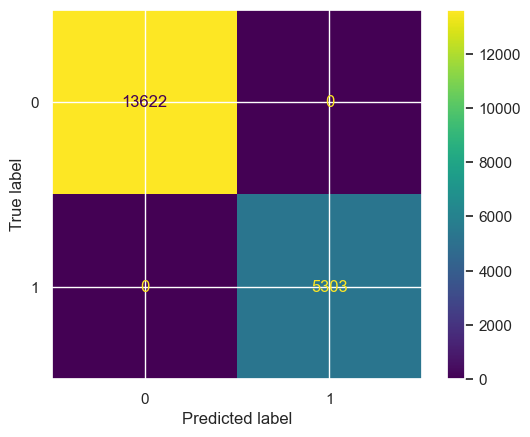

In [52]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

<div class="alert alert-info">
   In total of 18925 bookings. that are<br>
          NOT CANCELLED = 13622<br>
              CANCELLED = 5303<br>
</div>